In [1]:
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd  
import seaborn as sns 

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [2]:
boston_housing = load_boston()

C:\Users\bkmno\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [8]:
print(boston_housing.keys())
# print(boston_housing.target)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [17]:
print(boston_housing.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# print(boston_housing.DESCR)

#### create dataframe

In [9]:
bostondf= pd.DataFrame(boston_housing.data, columns=boston_housing.feature_names)
# medv
bostondf['price'] = boston_housing.target

In [10]:
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
bostondf.info() #

# boston.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


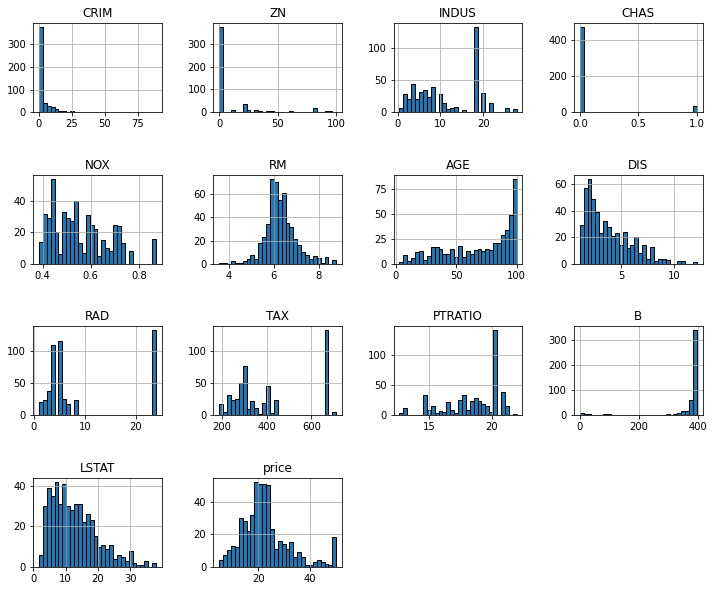

In [12]:
bostondf.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

features correlation with our target "price" 

checking for multi-co-linearity

<function matplotlib.pyplot.show(close=None, block=None)>

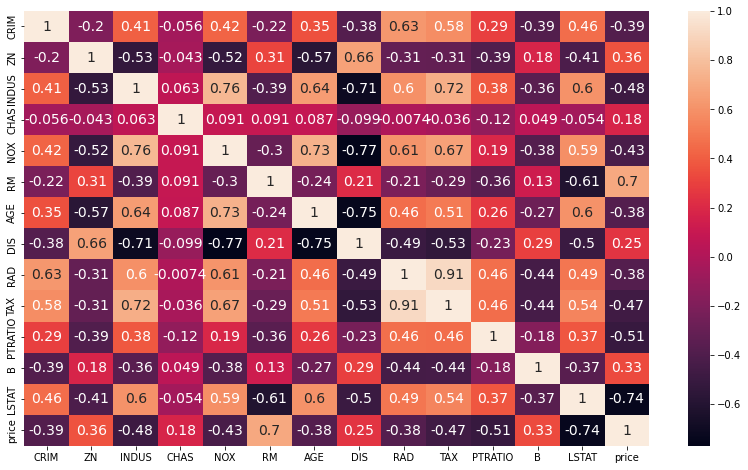

In [13]:
plt.figure(figsize = (14,8))
sns.heatmap(bostondf.corr(), annot=True, annot_kws={"size": 14})
plt.show
# there "LSTAT" and "RM" have high correlation with price 

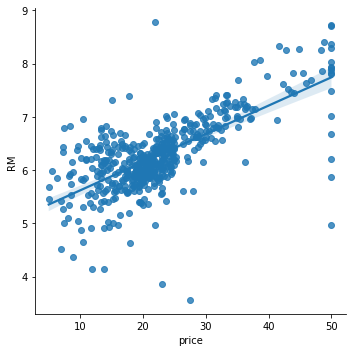

In [14]:
# bostondf.plot.scatter(x='price', y='RM', title='Scatterplot of price and RM');
sns.lmplot(x='price', y='RM', data =bostondf)

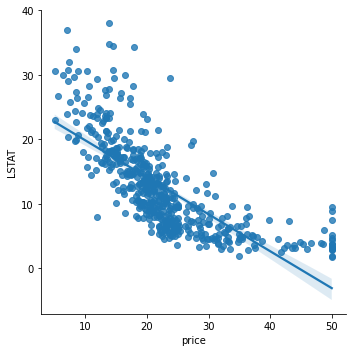

In [15]:
# bostondf.plot.scatter(x='ZN', y='price', title='Scatterplot of price and LSTAT');
sns.lmplot(x='price', y='LSTAT', data =bostondf)

In [332]:
# bostondf['ones'] = 1
# del bostondf["ones"]
# bostondf

In [16]:
from sklearn.pipeline import make_pipeline

X = bostondf.drop(["price"], axis=1)
Y = bostondf["price"]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, shuffle=True)

model = LinearRegression()
model.fit(X_train, Y_train)


# print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))



0.763417443213849


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_lg = bostondf.drop(["price"], axis=1)
Y_lg = np.log(bostondf["price"])

X_train, X_test, Y_train, Y_test = train_test_split(X_lg, Y_lg, test_size = 0.2, random_state=1, shuffle=True)

 
model = LinearRegression()

model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))


0.7881987707719109


In [19]:
print(Y_lg.skew())
print(Y.skew())

-0.33032129530987864
1.1080984082549072


In [18]:
from sklearn.preprocessing import PolynomialFeatures

X = bostondf.drop(["price"], axis=1)
Y = bostondf["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, shuffle=True)


poly = PolynomialFeatures(degree=2, include_bias = False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
 
model = LinearRegression()
model.fit(X_train_poly, Y_train)

print(model.score(X_test_poly, Y_test))



0.9196203363282509


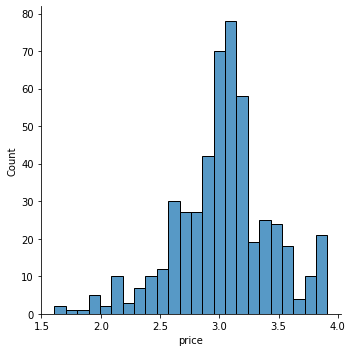

In [20]:
sns.displot(Y_lg)
plt.show()

### Things that I tried to do, but that didn't help to increase prediction.

In [317]:
# a = pd.get_dummies(bostondf["RAD"], prefix=['RAD'])
# bostondf.drop('RAD', inplace=True, axis=1)
# bostondf = pd.concat([bostondf, a], axis=1, join="inner")
# a

# b = pd.get_dummies(bostondf["ZN"], prefix=['ZN'])
# bostondf.drop('ZN', inplace=True, axis=1)
# bostondf = pd.concat([bostondf, b], axis=1, join="inner")
# b

In [318]:
# sns.boxplot(data=bostondf['CRIM'])
# plt.xticks(rotation=90)

In [476]:
bostondf["ZN"].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [167]:
bostondf.groupby(['ZN']).count()
col = bostondf.groupby(['ZN']).count()
cols = col[col["CRIM"] > 5]
cols.index
df = bostondf[bostondf.ZN.isin(cols.index)]
df
bostondf = df

Float64Index([0.0, 12.5, 20.0, 22.0, 25.0, 30.0, 40.0, 45.0, 80.0], dtype='float64', name='ZN')

In [143]:
col

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
ZN,,,,,,,,,,,,,
0.0,372,372,372,372,372,372,372,372,372,372,372,372,372
12.5,10,10,10,10,10,10,10,10,10,10,10,10,10
17.5,1,1,1,1,1,1,1,1,1,1,1,1,1
18.0,1,1,1,1,1,1,1,1,1,1,1,1,1
20.0,21,21,21,21,21,21,21,21,21,21,21,21,21
21.0,4,4,4,4,4,4,4,4,4,4,4,4,4
22.0,10,10,10,10,10,10,10,10,10,10,10,10,10
25.0,10,10,10,10,10,10,10,10,10,10,10,10,10
28.0,3,3,3,3,3,3,3,3,3,3,3,3,3


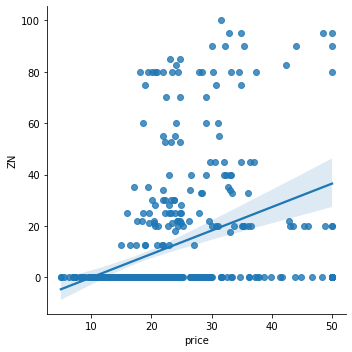

In [321]:
sns.lmplot(x='price', y='ZN', data =bostondf)

In [327]:
print(bostondf[bostondf["ZN"]>=80].count())
506-29

CRIM       29
ZN         29
INDUS      29
CHAS       29
NOX        29
RM         29
AGE        29
DIS        29
RAD        29
TAX        29
PTRATIO    29
B          29
LSTAT      29
price      29
dtype: int64


477

In [204]:
df = bostondf.drop(bostondf[bostondf["ZN"]>=80].index)
bostondf = df
bostondf